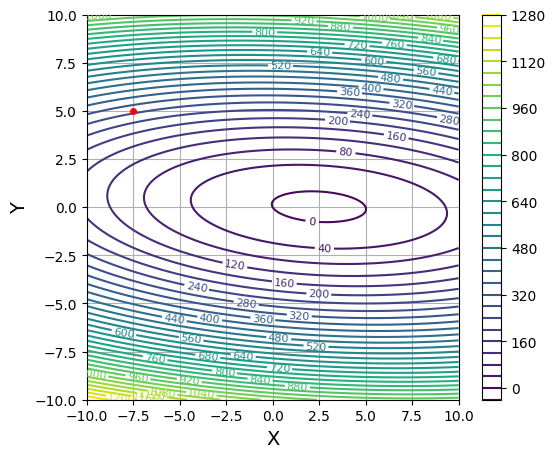

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

def f(x, y):
    return x**2 + x*y + 10*y**2 - 5*x - 3*y

def grad_f(vars):
    x, y = vars
    grad_x = 2 * x + y - 5
    grad_y = x + 20 * y - 3
    return np.array([grad_x, grad_y])

def g_grafico(path):

  x = np.linspace(-10, 10, 400)
  y = np.linspace(-10, 10, 400)

  # Cria uma grade de pontos (x, y)
  X, Y = np.meshgrid(x, y)
  Z = f(X, Y)

  # Plota o gráfico de contorno
  plt.figure(figsize=(6, 5))
  contours = plt.contour(X, Y, Z, levels=40, cmap='viridis')
  plt.clabel(contours, inline=True, fontsize=8, fmt='%1.0f')
  plt.colorbar(contours)
  plt.xlabel('X', fontsize=14)
  plt.ylabel('Y', fontsize=14)
  plt.grid(True)

  # Plota o ponto
  for item in path:
    plt.plot(item[0], item[1], 'ro', markersize=4)

  plt.show()

g_grafico([tuple([-7.5, 5])])

In [3]:
f(-7, 7.5)

571.5

In [4]:
from scipy.optimize import fsolve
min_point = fsolve(grad_f, [0, 0])
min_point

array([2.48717949, 0.02564103])

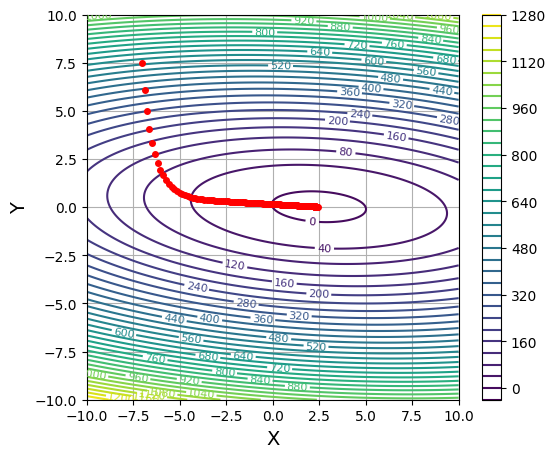

I: 248
f(2.4114482694327073,0.029835409597245816) = -6.250816756305826
Grad: [-0.14726805  0.00815646]
new_x: 2.412920949948081, new_y: 0.029753844983469578
abs(grad) < epsilon: (0.14726805153733924, 0.008156461377623714) < 0.1
------------------


In [ ]:
import numpy as np

# Parâmetros iniciais
x = -7
y = 7.5
gama = 0.01
epsilon = 0.1
max_iterations = 1000
iterations = 0
path = []

# Executando o método do gradiente
while iterations < max_iterations:

    path.append(tuple([x,y]))
    g_grafico(path)

    grad = grad_f([x, y])
    z =  f(x,y)

    new_x = x - gama * grad[0]
    new_y = y - gama * grad[1]

    print(f"I: {iterations}")
    print(f"f({x},{y}) = {z}")
    print(f"Grad: {grad}")
    print(f"new_x: {new_x}, new_y: {new_y}")
    print(f"abs(grad) < epsilon: ({abs(grad[0])}, {abs(grad[1])}) < {epsilon}")

    print("------------------")


    # Condição de parada
    if abs(grad[0]) < epsilon and abs(grad[1]) < epsilon:
        break

    x, y = new_x, new_y
    iterations += 1
    clear_output(wait=True)

# Resultado
print(f"Minimized at: ({x}, {y}) after {iterations} iterations")